In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from math import factorial
import numpy as np
import scipy.io
import scipy.signal
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Power Trace
df_power_trace = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Crypto Project/Project_Code/d_is_47309_CH1.CSV')
df_power_trace_clean = df_power_trace[['Time', 'Voltage']]

df_timing_trace = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Crypto Project/Project_Code/d_is_47309_CH2.CSV')
df_timing_trace_clean = df_timing_trace[['Time', 'Voltage']]

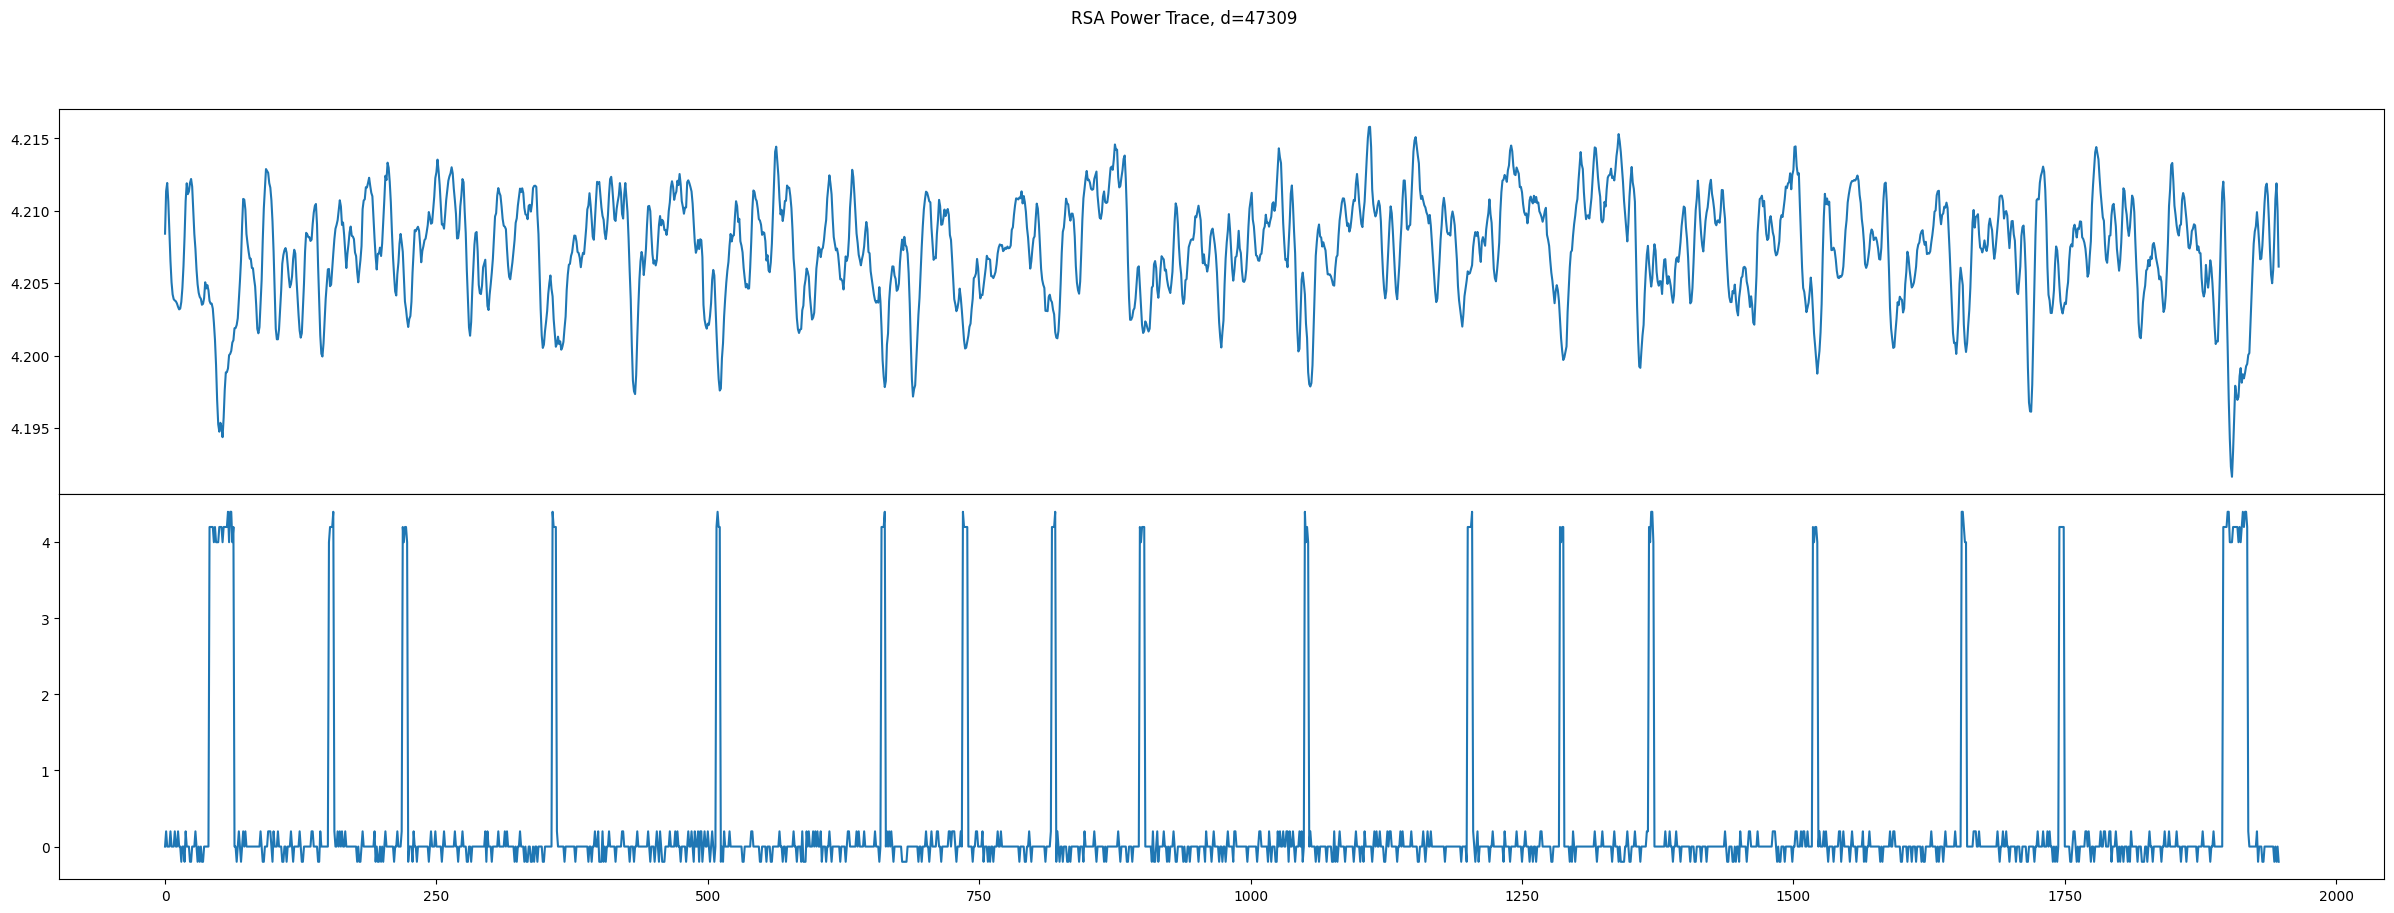

In [4]:
df_timing_voltage = df_timing_trace_clean['Voltage']


df_power_trace_voltage_filtered = scipy.signal.savgol_filter(df_power_trace_clean['Voltage'], 35, 10)

# Plotting the graph, sharing an x-axis
fig = plt.figure(figsize=(30,10))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True)
fig.suptitle('RSA Power Trace, d=47309')
axs[0].plot(df_power_trace_voltage_filtered)
axs[1].plot(df_timing_voltage)

In [5]:
arr = np.array(df_power_trace_voltage_filtered)
arr = np.sort(arr)
arr[0:20]

array([4.19162609, 4.19232353, 4.19336801, 4.19425089, 4.19436152,
       4.19474181, 4.19504993, 4.19525396, 4.19535532, 4.19559657,
       4.19571324, 4.19611976, 4.1961445 , 4.1967582 , 4.19691197,
       4.19693797, 4.19698572, 4.19713803, 4.19716766, 4.19731706])

In [6]:
minvalue = 4.19162609 + 0.0099
signatures = []

limit = 65 #comment this out

first = 0;
start = first;
for i in range(1, len(df_power_trace_voltage_filtered)):
    if df_power_trace_voltage_filtered[i] < minvalue:

        #comment this if statement out to see distribution
        #if below limit, likely will be a anomaly point or the segment is not completed yet.
        if i - start < limit:
            continue

        signatures.append(df_power_trace_voltage_filtered[start : i])
        start = i

print(f"Length: {len(signatures)} ")
for i in range(len(signatures)):
    print(len(signatures[i]))

Length: 17 
103
178
66
83
79
152
75
85
151
72
242
71
163
71
67
161
70
